# 1.EDA

Train shape: (3000888, 6)
Test shape : (28512, 5)
   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0


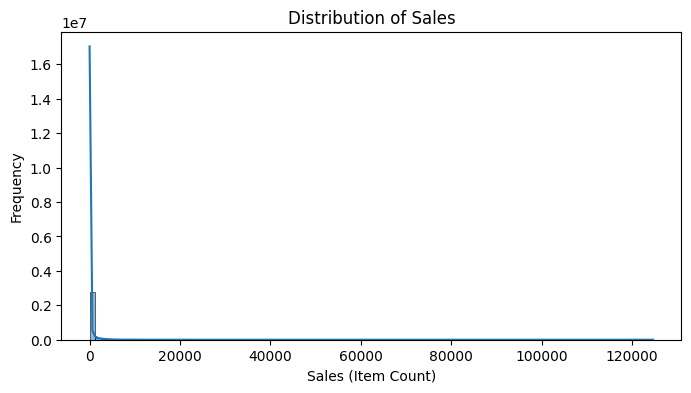

Sales Summary:
count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64


In [ ]:
# =====================================
# 0. Setup & Load Libraries
# =====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# 1. Load Data
# =====================================
train = pd.read_csv("data/train.csv", parse_dates=["date"])
test = pd.read_csv("data/test.csv", parse_dates=["date"])

print("Train shape:", train.shape)
print("Test shape :", test.shape)
print(train.head())

# =====================================
# 2. Understand the Target "sales"
# =====================================
plt.figure(figsize=(8, 4))
sns.histplot(train["sales"], bins=100, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales (Item Count)")
plt.ylabel("Frequency")
plt.show()

print("Sales Summary:")
print(train["sales"].describe())

In [2]:
# =====================================
# Train/Test
# =====================================

print("Train shape:", train.shape)
print("Test shape :", test.shape)

print("\nTrain columns:", train.columns.tolist())
print("Test columns :", test.columns.tolist())

print("\nMissing values in train:")
print(train.isnull().sum())

print("\nMissing values in test:")
print(test.isnull().sum())

print("\nDate range:")
print("Train:", train["date"].min(), "to", train["date"].max())
print("Test :", test["date"].min(), "to", test["date"].max())

print("\nSales stats:")
print(train["sales"].describe())

for col in ['store_nbr', 'family', 'onpromotion']:
    print(f"{col} unique values:", train[col].nunique())

print()
print("train_data")
print(train.head())

print("test_data")
print(test.head())

Train shape: (3000888, 6)
Test shape : (28512, 5)

Train columns: ['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion']
Test columns : ['id', 'date', 'store_nbr', 'family', 'onpromotion']

Missing values in train:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Missing values in test:
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

Date range:
Train: 2013-01-01 00:00:00 to 2017-08-15 00:00:00
Test : 2017-08-16 00:00:00 to 2017-08-31 00:00:00

Sales stats:
count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64
store_nbr unique values: 54
family unique values: 33
onpromotion unique values: 362

train_data
   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0       

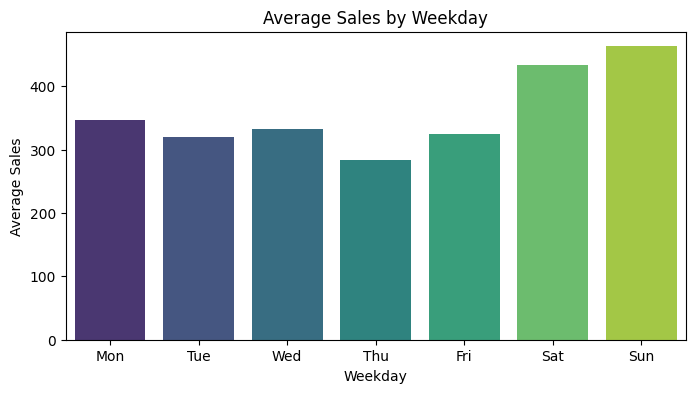

In [8]:
train["weekday"] = train["date"].dt.weekday

weekday_sales = train.groupby("weekday")["sales"].mean().reset_index()
weekday_sales["day_name"] = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

plt.figure(figsize=(8, 4))
sns.barplot(
    data=weekday_sales,
    x="day_name",
    y="sales",
    order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
    palette="viridis",
    hue=weekday_sales["day_name"],
)
plt.title("Average Sales by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Sales")
plt.show()

C:\Users\giuse\AppData\Local\Temp\ipykernel_18900\2453747379.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=family_sales, x="sales", y="family", palette="viridis")


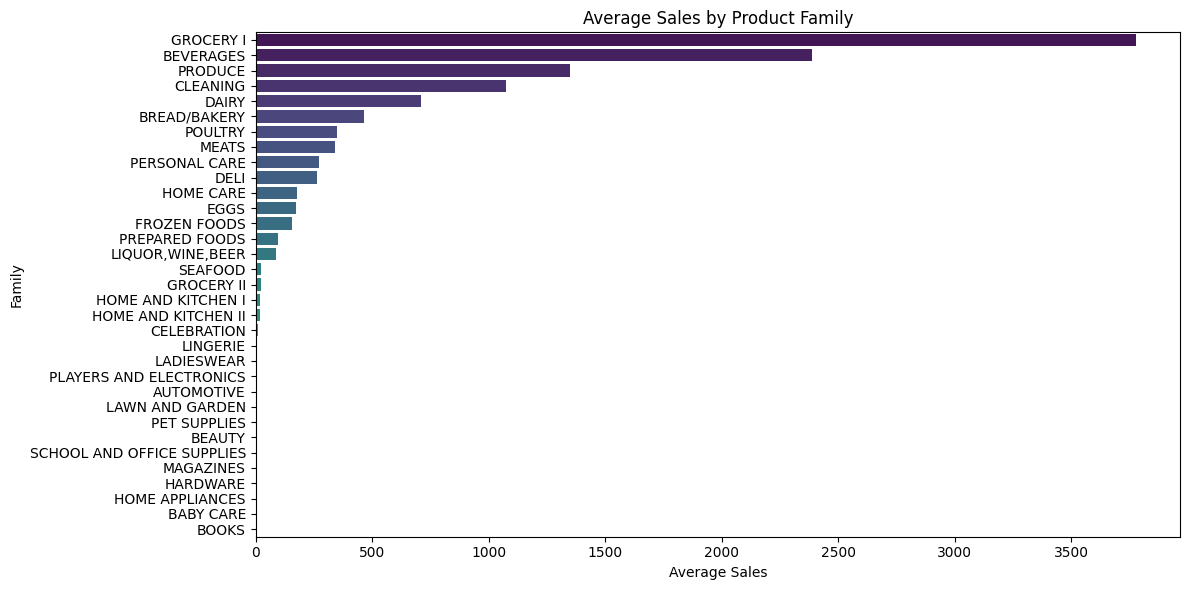

In [13]:
family_sales = train.groupby("family")["sales"].mean().reset_index().sort_values("sales", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=family_sales, x="sales", y="family", palette="viridis")
plt.title("Average Sales by Product Family")
sns.barplot(data=family_sales, x="sales", y="family", palette="viridis", hue="family")
plt.xlabel("Average Sales")
plt.ylabel("Family")
plt.tight_layout()
plt.show()

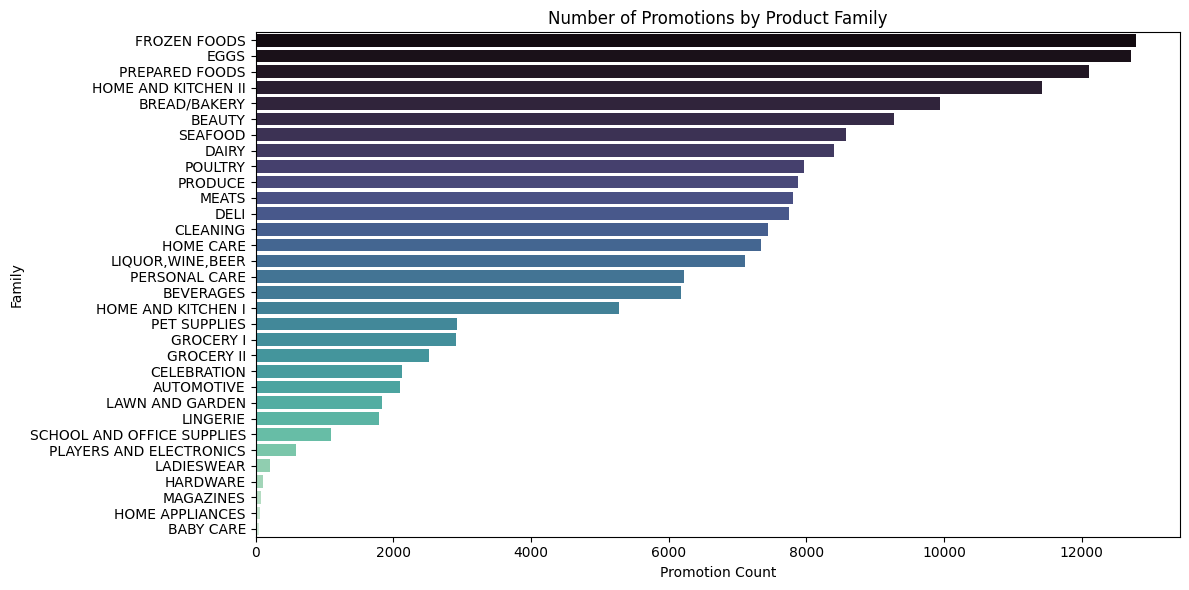

In [15]:
promo_counts = train[train["onpromotion"] == 1].groupby("family")["onpromotion"].count().reset_index()
promo_counts = promo_counts.rename(columns={"onpromotion": "promotion_count"})
promo_counts = promo_counts.sort_values("promotion_count", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=promo_counts, x="promotion_count", y="family", palette="mako", hue="family")
plt.title("Number of Promotions by Product Family")
plt.xlabel("Promotion Count")
plt.ylabel("Family")
plt.tight_layout()
plt.show()


C:\Users\giuse\AppData\Local\Temp\ipykernel_18900\325871113.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_pivot.reset_index(), x="promo_boost", y="family", palette="rocket")


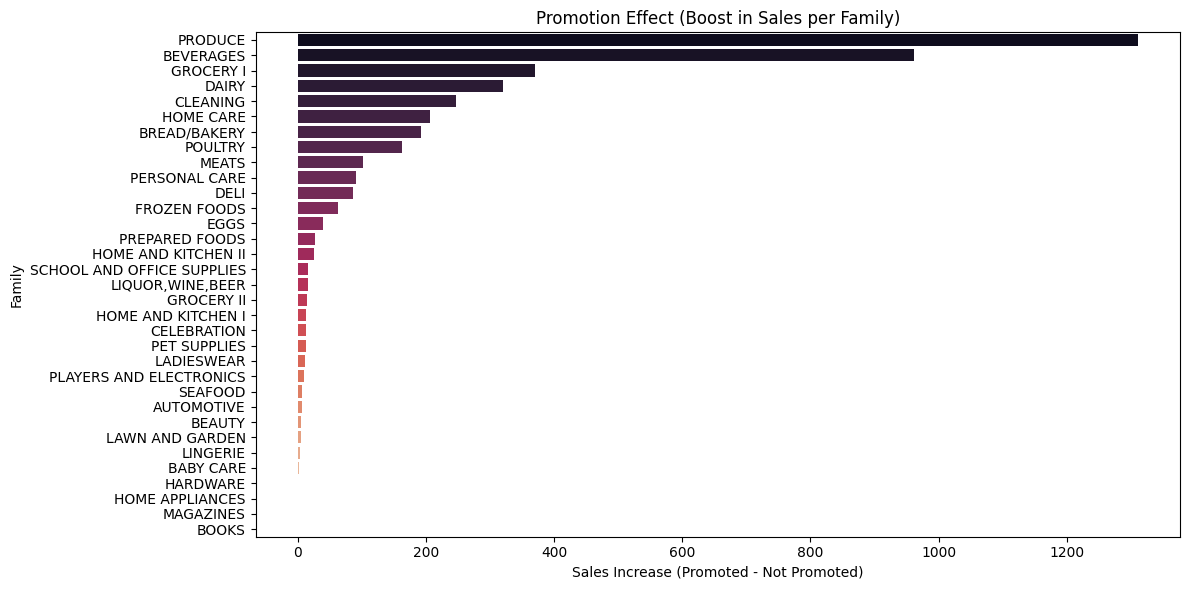

In [ ]:
# family × onpromotion
promo_effect = train.groupby(["family", "onpromotion"])["sales"].mean().reset_index()

# pivot
promo_pivot = promo_effect.pivot(index="family", columns="onpromotion", values="sales")
promo_pivot["promo_boost"] = promo_pivot[1] - promo_pivot[0]

promo_pivot = promo_pivot.sort_values("promo_boost", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=promo_pivot.reset_index(), x="promo_boost", y="family", palette="rocket")
plt.title("Promotion Effect (Boost in Sales per Family)")
plt.xlabel("Sales Increase (Promoted - Not Promoted)")
plt.ylabel("Family")
plt.tight_layout()
plt.show()

C:\Users\giuse\AppData\Local\Temp\ipykernel_18900\3159084462.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_by_weekday, x="day_name", y="promotion_count", palette="crest")


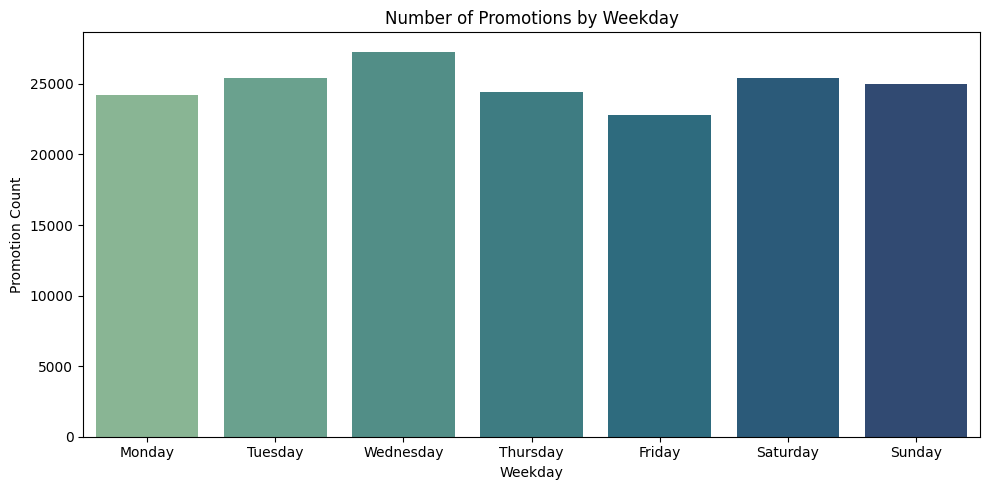

In [17]:
train["weekday"] = train["date"].dt.weekday
train["day_name"] = train["date"].dt.day_name()

promo_by_weekday = train[train["onpromotion"] == 1].groupby("day_name")["onpromotion"].count().reset_index()
promo_by_weekday.columns = ["day_name", "promotion_count"]

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
promo_by_weekday["day_name"] = pd.Categorical(promo_by_weekday["day_name"], categories=weekday_order, ordered=True)
promo_by_weekday = promo_by_weekday.sort_values("day_name")

plt.figure(figsize=(10, 5))
sns.barplot(data=promo_by_weekday, x="day_name", y="promotion_count", palette="crest")
plt.title("Number of Promotions by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Promotion Count")
plt.tight_layout()
plt.show()

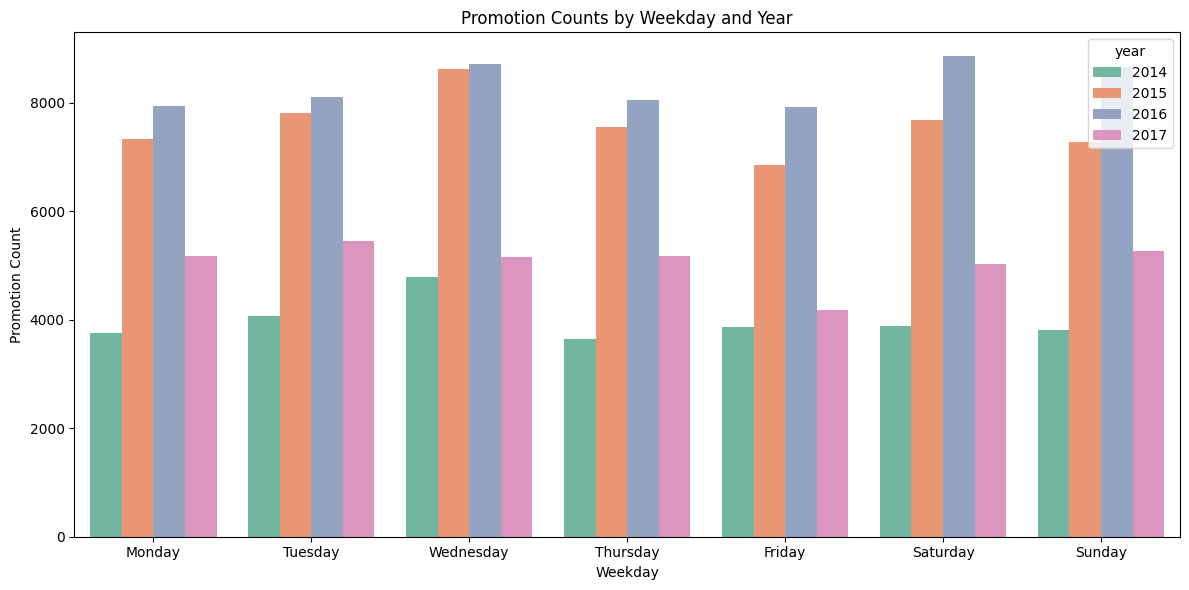

In [18]:
train["year"] = train["date"].dt.year
train["weekday"] = train["date"].dt.weekday
train["day_name"] = train["date"].dt.day_name()

promo_by_year_weekday = (
    train[train["onpromotion"] == 1]
    .groupby(["year", "day_name"])["onpromotion"]
    .count()
    .reset_index()
    .rename(columns={"onpromotion": "promotion_count"})
)

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
promo_by_year_weekday["day_name"] = pd.Categorical(promo_by_year_weekday["day_name"], categories=weekday_order, ordered=True)
promo_by_year_weekday = promo_by_year_weekday.sort_values(["year", "day_name"])

plt.figure(figsize=(12, 6))
sns.barplot(
    data=promo_by_year_weekday,
    x="day_name",
    y="promotion_count",
    hue="year",
    palette="Set2"
)
plt.title("Promotion Counts by Weekday and Year")
plt.xlabel("Weekday")
plt.ylabel("Promotion Count")
plt.tight_layout()
plt.show()

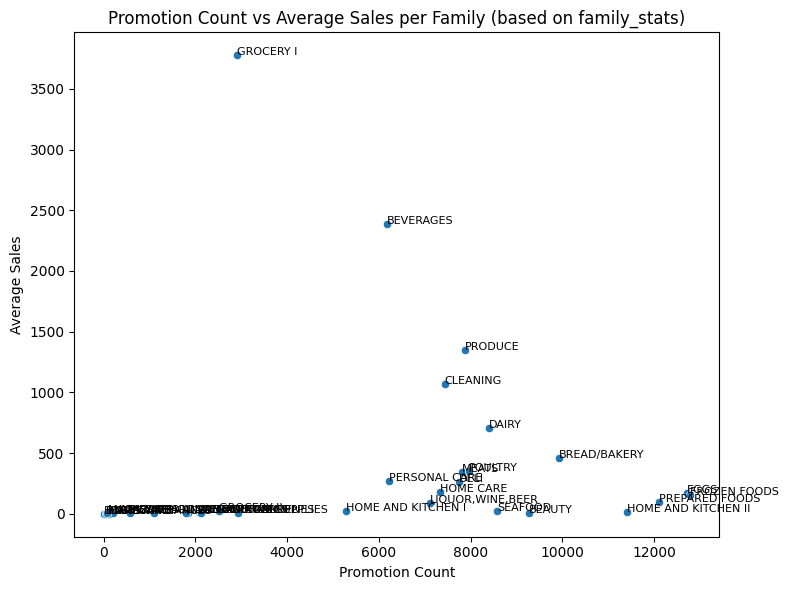

In [19]:
avg_sales = train.groupby("family")["sales"].mean().reset_index()
avg_sales.rename(columns={"sales": "avg_sales"}, inplace=True)

promo_count = train[train["onpromotion"] == 1].groupby("family")["onpromotion"].count().reset_index()
promo_count.rename(columns={"onpromotion": "promotion_count"}, inplace=True)

family_stats = pd.merge(avg_sales, promo_count, on="family", how="left")
family_stats["promotion_count"] = family_stats["promotion_count"].fillna(0).astype(int)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=family_stats, x="promotion_count", y="avg_sales")

for i, row in family_stats.iterrows():
    plt.text(row["promotion_count"], row["avg_sales"], row["family"], fontsize=8)

plt.title("Promotion Count vs Average Sales per Family (based on family_stats)")
plt.xlabel("Promotion Count")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

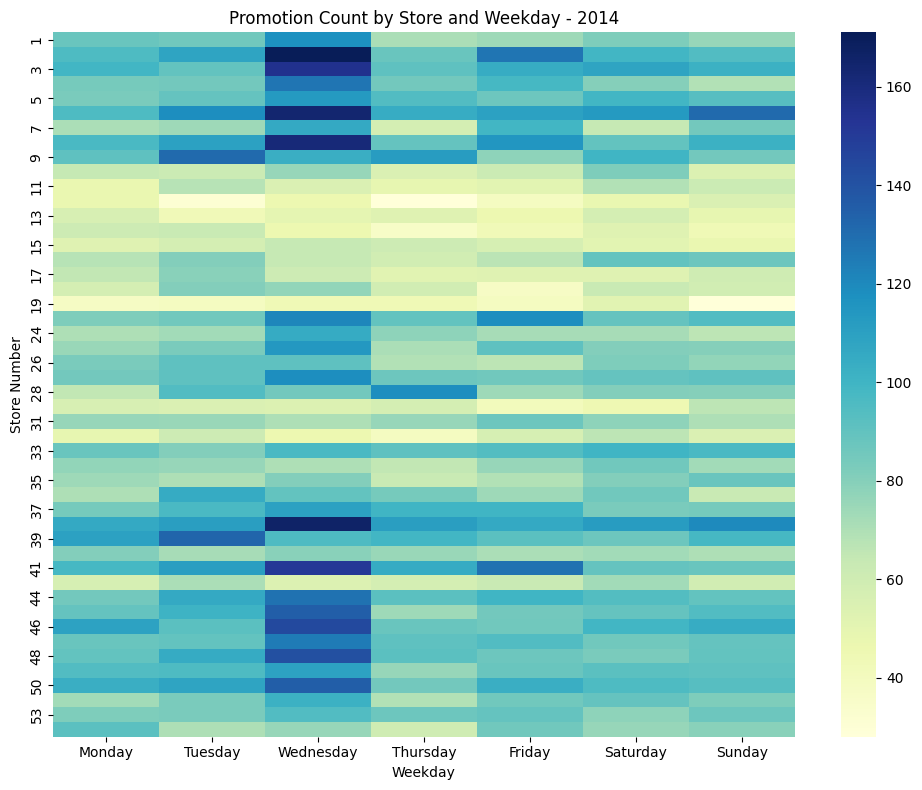

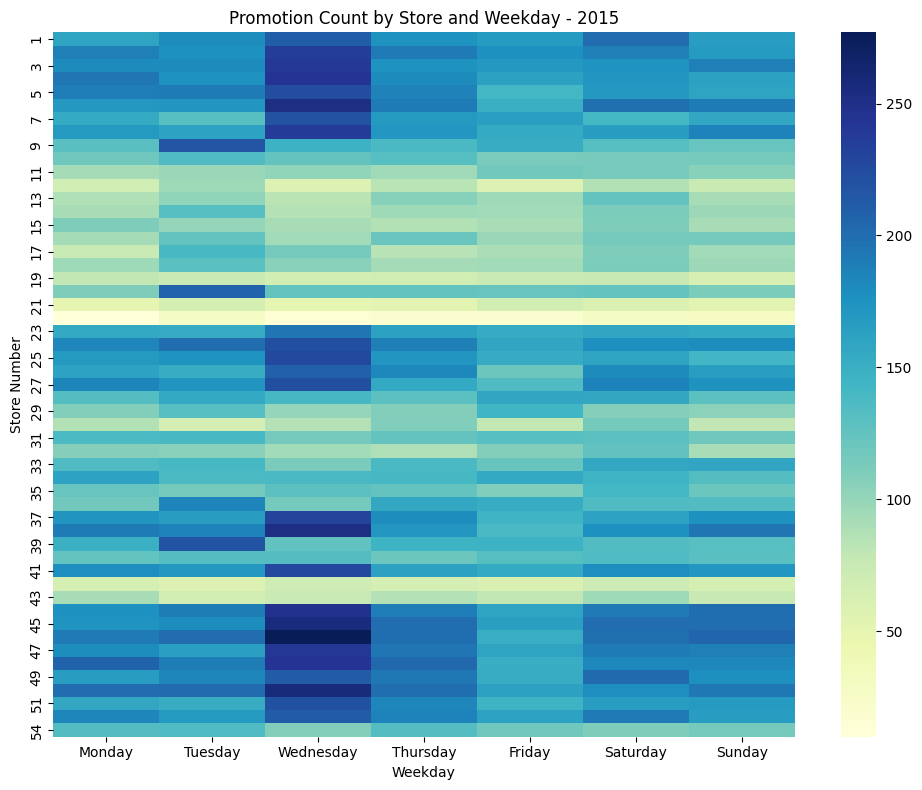

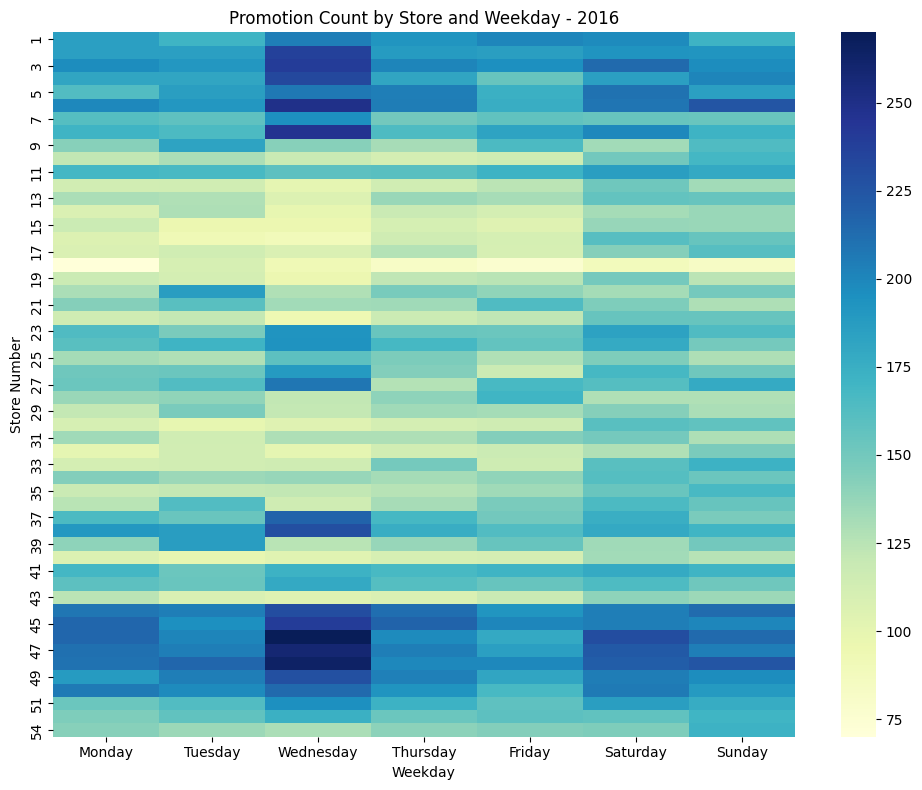

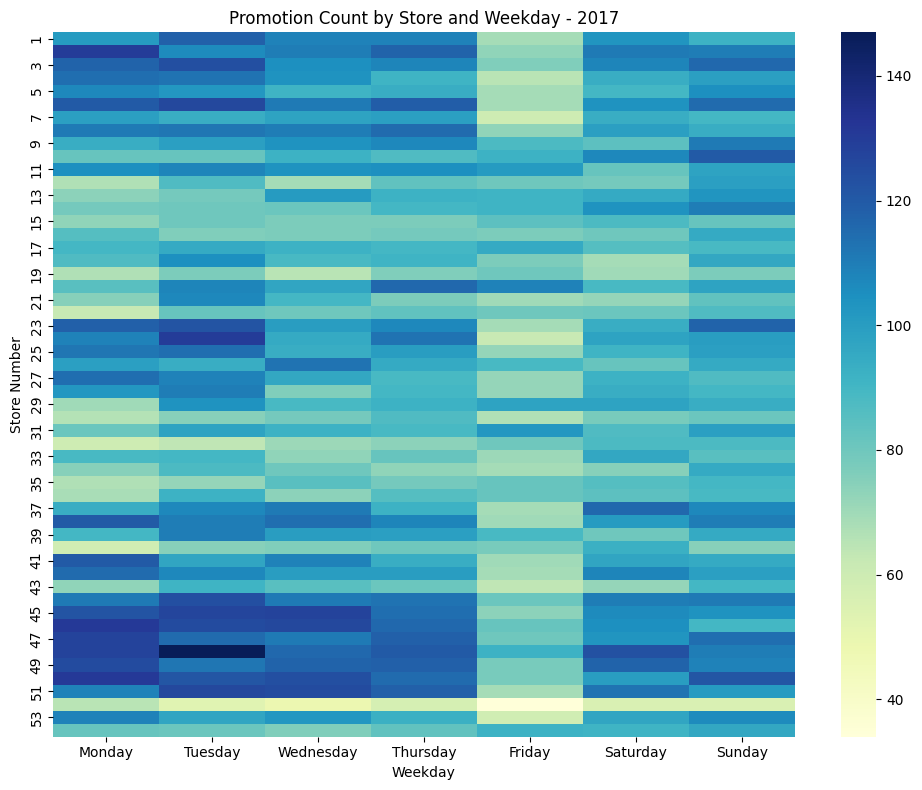

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

train["year"] = train["date"].dt.year
train["day_name"] = train["date"].dt.day_name()

store_weekday_promo = (
    train[train["onpromotion"] == 1]
    .groupby(["year", "store_nbr", "day_name"])["onpromotion"]
    .count()
    .reset_index(name="promotion_count")
)

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
store_weekday_promo["day_name"] = pd.Categorical(store_weekday_promo["day_name"], categories=weekday_order, ordered=True)

import seaborn as sns
import matplotlib.pyplot as plt

years = store_weekday_promo["year"].unique()
for y in sorted(years):
    pivot_df = store_weekday_promo[store_weekday_promo["year"] == y].pivot(
        index="store_nbr", columns="day_name", values="promotion_count"
    ).fillna(0)

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=False, fmt="g", cmap="YlGnBu")
    plt.title(f"Promotion Count by Store and Weekday - {y}")
    plt.xlabel("Weekday")
    plt.ylabel("Store Number")
    plt.tight_layout()
    plt.show()

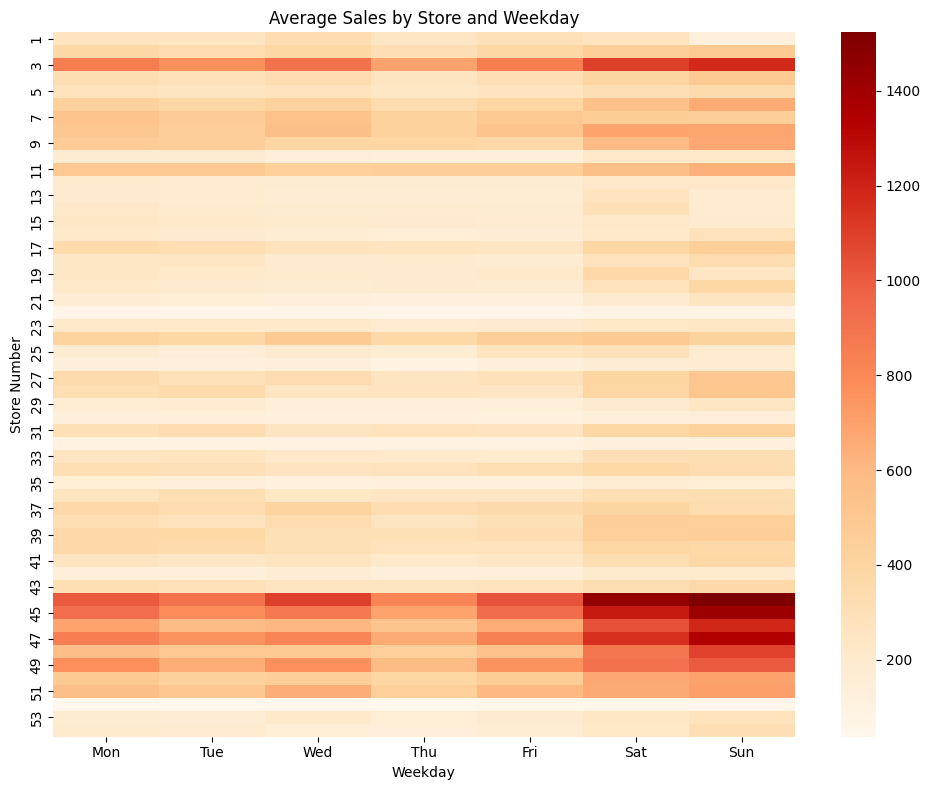

In [21]:
train["weekday"] = train["date"].dt.weekday
weekday_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
train["weekday_name"] = train["weekday"].apply(lambda x: weekday_labels[x])

weekday_sales = (
    train.groupby(["store_nbr", "weekday_name"])["sales"]
    .mean()
    .reset_index()
)

pivot_sales = weekday_sales.pivot(index="store_nbr", columns="weekday_name", values="sales").fillna(0)

pivot_sales = pivot_sales[["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]]

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_sales, annot=False, fmt=".0f", cmap="OrRd")
plt.title("Average Sales by Store and Weekday")
plt.xlabel("Weekday")
plt.ylabel("Store Number")
plt.tight_layout()
plt.show()

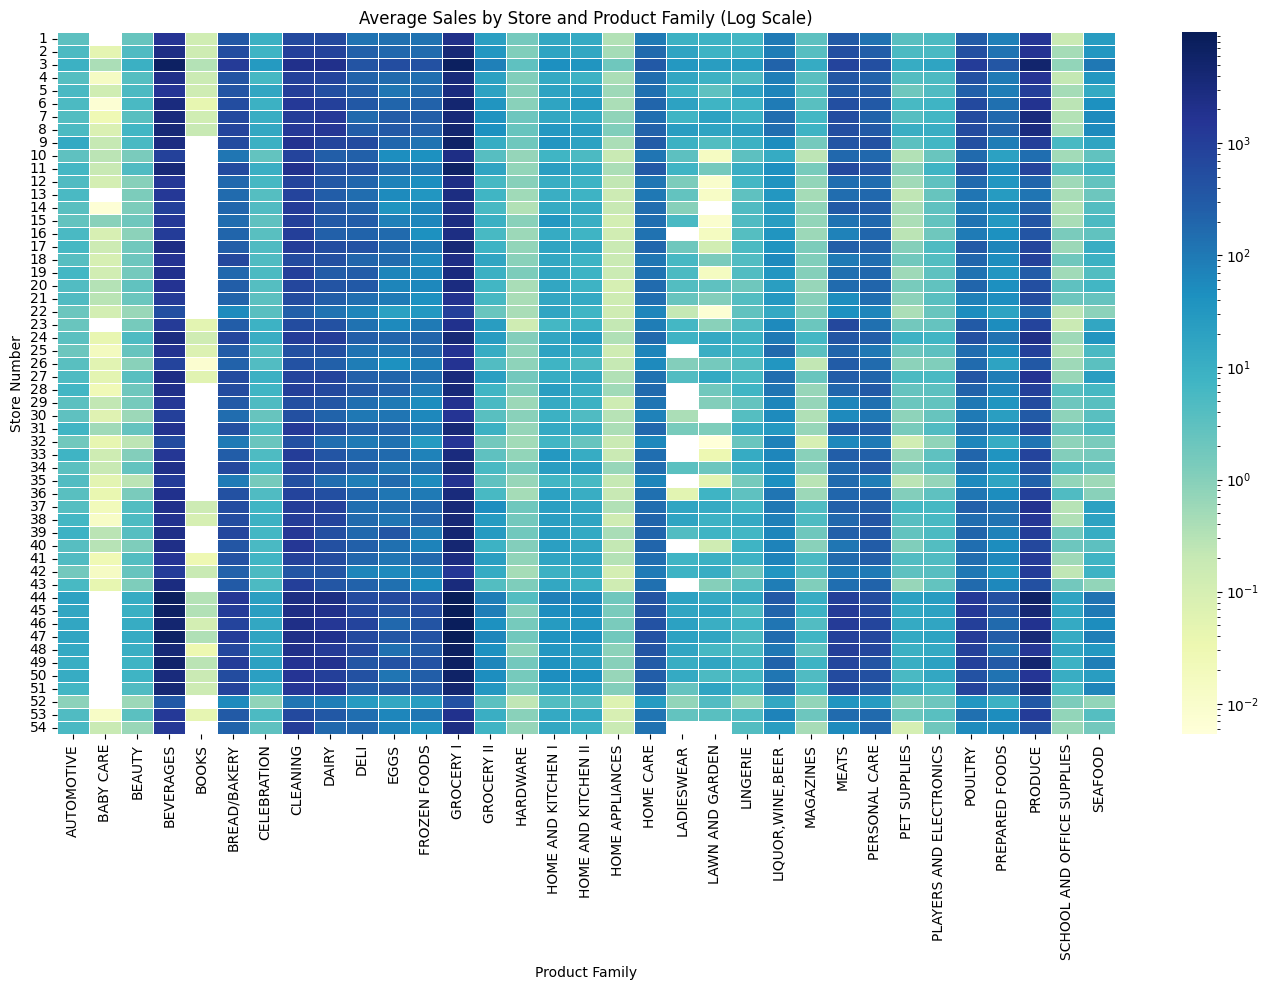

In [22]:
from matplotlib.colors import LogNorm

store_family_sales = (
    train.groupby(["store_nbr", "family"])["sales"]
    .mean()
    .reset_index()
)

pivot_store_family = store_family_sales.pivot(index="store_nbr", columns="family", values="sales").fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_store_family,
    cmap="YlGnBu",
    norm=LogNorm(),
    linewidths=0.5
)
plt.title("Average Sales by Store and Product Family (Log Scale)")
plt.xlabel("Product Family")
plt.ylabel("Store Number")
plt.tight_layout()
plt.show()

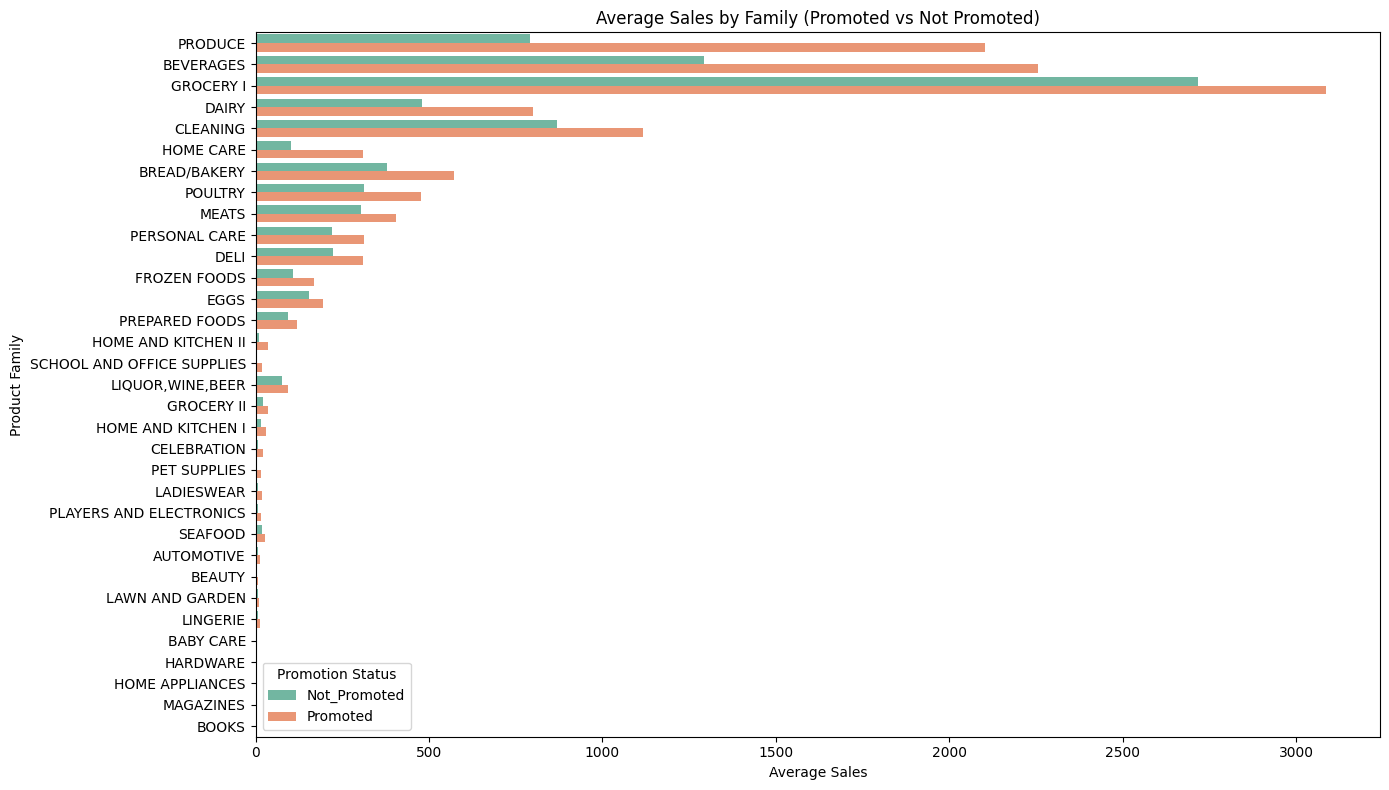

In [23]:
promo_effect = (
    train.groupby(["family", "onpromotion"])["sales"]
    .mean()
    .reset_index()
)

promo_pivot = promo_effect.pivot_table(index="family", columns="onpromotion", values="sales")
promo_pivot = promo_pivot.rename(columns={0: "Not_Promoted", 1: "Promoted"}).fillna(0)
promo_pivot = promo_pivot.reset_index()

promo_melted = promo_pivot.melt(
    id_vars="family",
    value_vars=["Not_Promoted", "Promoted"],
    var_name="Promotion",
    value_name="Avg_Sales"
)

promo_pivot["Boost"] = promo_pivot["Promoted"] - promo_pivot["Not_Promoted"]

order = promo_pivot.sort_values("Boost", ascending=False)["family"]

plt.figure(figsize=(14, 8))
sns.barplot(
    data=promo_melted,
    x="Avg_Sales",
    y="family",
    hue="Promotion",
    order=order,
    palette="Set2"
)
plt.title("Average Sales by Family (Promoted vs Not Promoted)")
plt.xlabel("Average Sales")
plt.ylabel("Product Family")
plt.legend(title="Promotion Status")
plt.tight_layout()
plt.show()

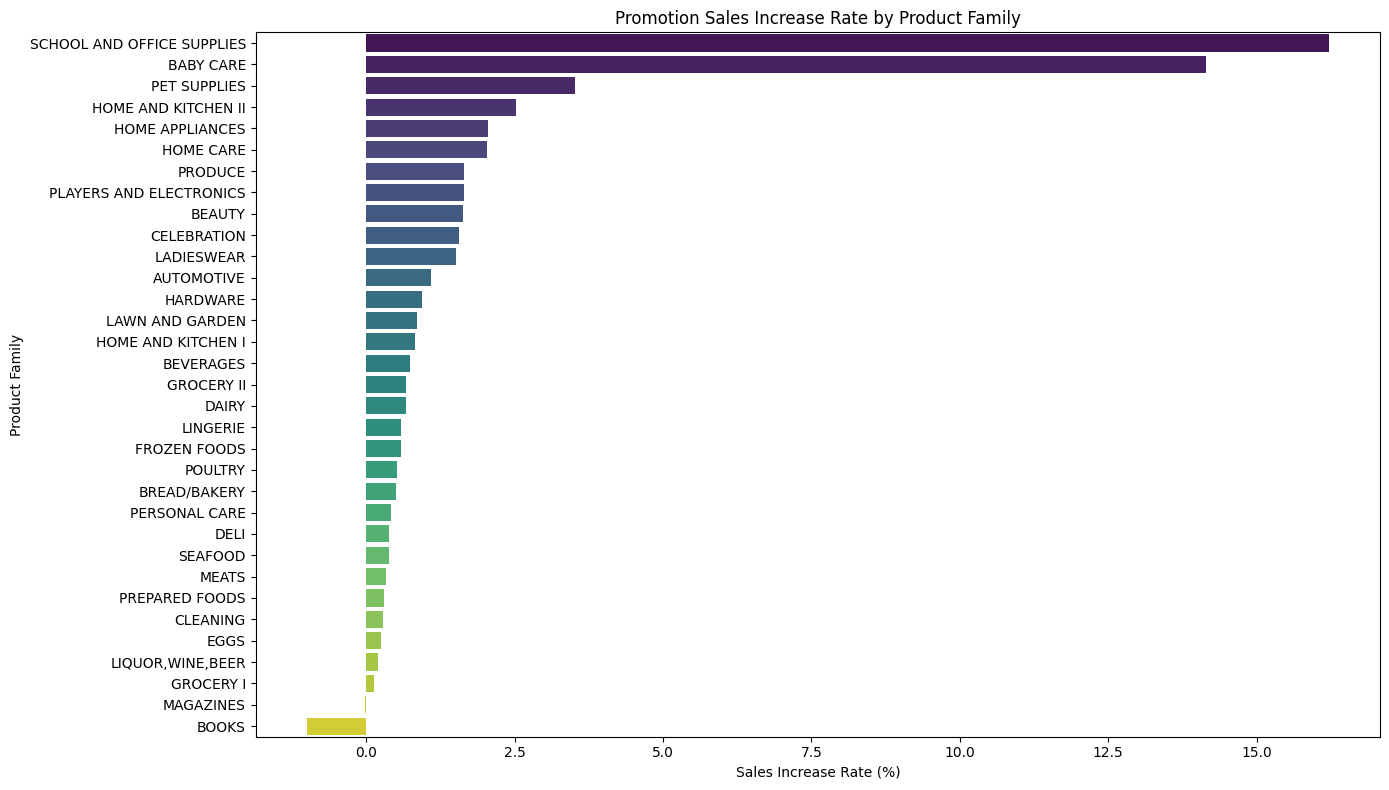

In [24]:
promo_effect = (
    train.groupby(["family", "onpromotion"])["sales"]
    .mean()
    .reset_index()
)

promo_pivot = promo_effect.pivot_table(index="family", columns="onpromotion", values="sales")
promo_pivot = promo_pivot.rename(columns={0: "Not_Promoted", 1: "Promoted"}).fillna(0)

promo_pivot["Not_Promoted_safe"] = promo_pivot["Not_Promoted"].replace(0, 1e-6)
promo_pivot["Boost_Rate"] = (promo_pivot["Promoted"] - promo_pivot["Not_Promoted"]) / promo_pivot["Not_Promoted_safe"]
promo_pivot = promo_pivot.reset_index()

promo_pivot = promo_pivot.sort_values("Boost_Rate", ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=promo_pivot, x="Boost_Rate", y="family", palette="viridis")
plt.title("Promotion Sales Increase Rate by Product Family")
plt.xlabel("Sales Increase Rate (%)")
plt.ylabel("Product Family")
plt.tight_layout()
plt.show()

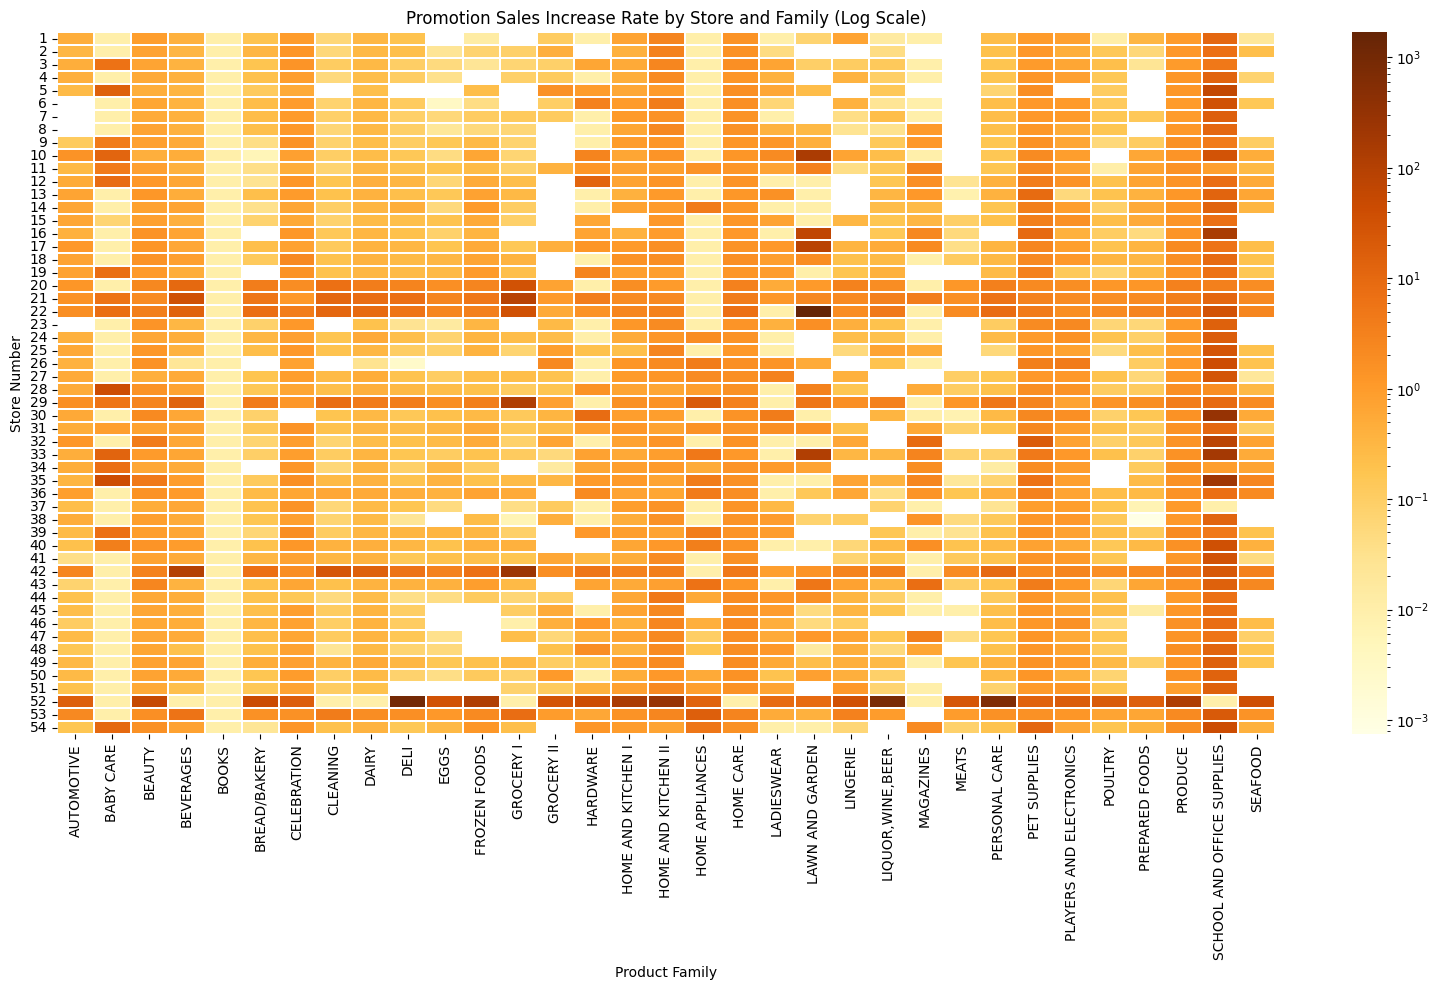

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

store_family_promo = (
    train.groupby(["store_nbr", "family", "onpromotion"])["sales"]
    .mean()
    .reset_index()
)

pivot = store_family_promo.pivot_table(
    index=["store_nbr", "family"], columns="onpromotion", values="sales"
).reset_index()

pivot = pivot.rename(columns={0: "Not_Promoted", 1: "Promoted"})

pivot["Not_Promoted_safe"] = pivot["Not_Promoted"].replace(0, 1e-6)

pivot["Boost_Rate"] = (pivot["Promoted"] - pivot["Not_Promoted"]) / pivot["Not_Promoted_safe"]

heatmap_data = pivot.pivot(index="store_nbr", columns="family", values="Boost_Rate").fillna(1e-2)

plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data,
    cmap="YlOrBr",
    norm=LogNorm(),  # 対数スケール
    linewidths=0.3
)
plt.title("Promotion Sales Increase Rate by Store and Family (Log Scale)")
plt.xlabel("Product Family")
plt.ylabel("Store Number")
plt.tight_layout()
plt.show()


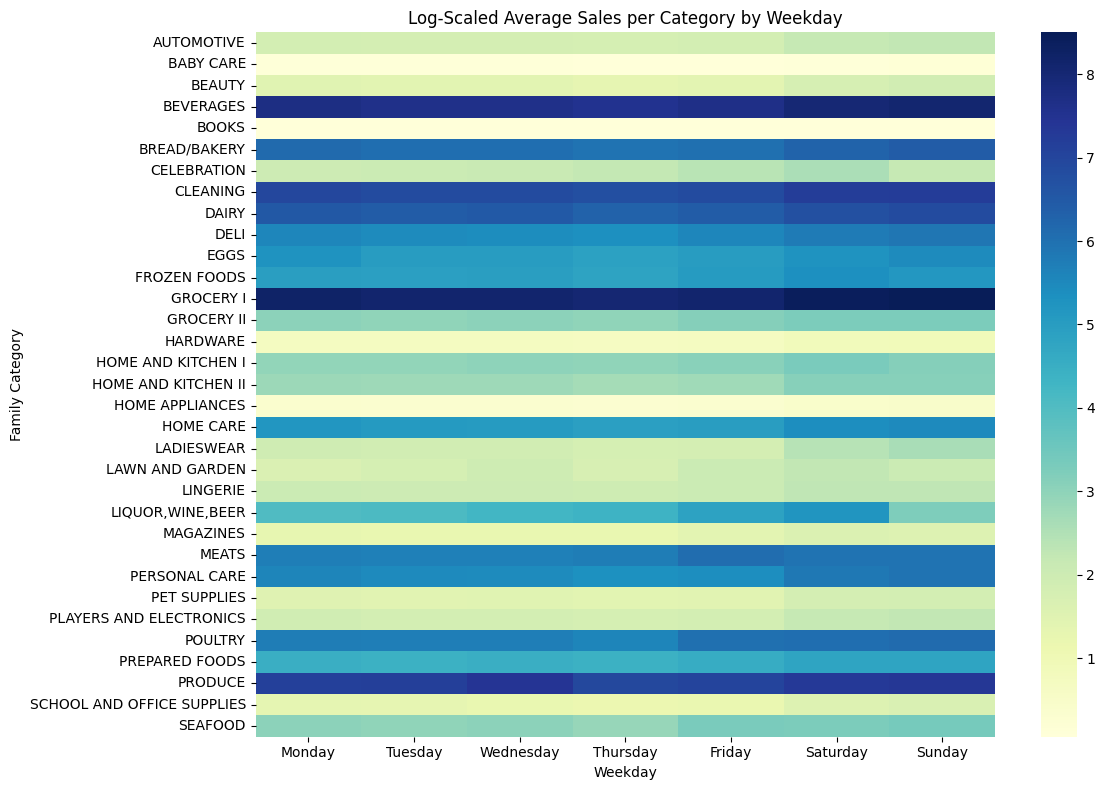

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train["weekday"] = train["date"].dt.weekday
train["day_name"] = train["date"].dt.day_name()

pivot_df = train.pivot_table(
    index="family", columns="day_name", values="sales", aggfunc="mean"
)

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_df = pivot_df[weekday_order]

log_pivot = np.log1p(pivot_df)

plt.figure(figsize=(12, 8))
sns.heatmap(log_pivot, cmap="YlGnBu", annot=False, fmt=".2f")

plt.title("Log-Scaled Average Sales per Category by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Family Category")
plt.tight_layout()
plt.show()

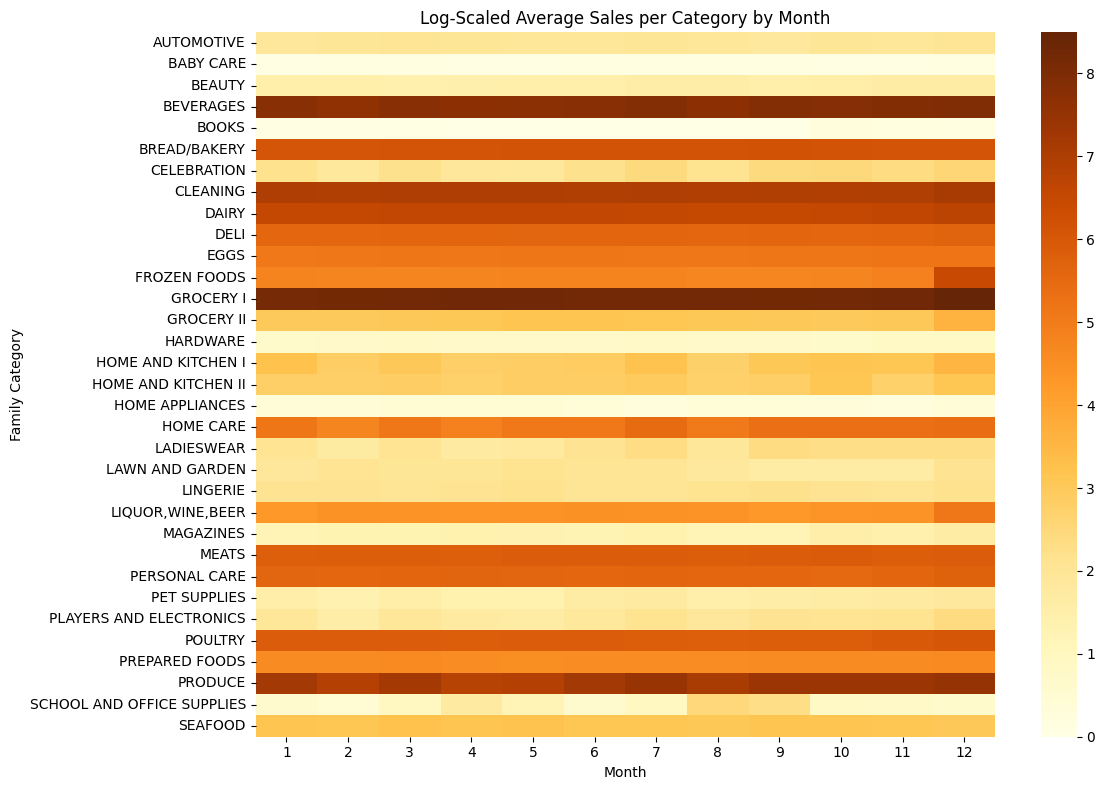

In [27]:
train["month"] = train["date"].dt.month

month_family_pivot = train.pivot_table(
    index="family", columns="month", values="sales", aggfunc="mean"
)

log_month_family = np.log1p(month_family_pivot)

plt.figure(figsize=(12, 8))
sns.heatmap(log_month_family, cmap="YlOrBr", annot=False, fmt=".2f")

plt.title("Log-Scaled Average Sales per Category by Month")
plt.xlabel("Month")
plt.ylabel("Family Category")
plt.tight_layout()
plt.show()

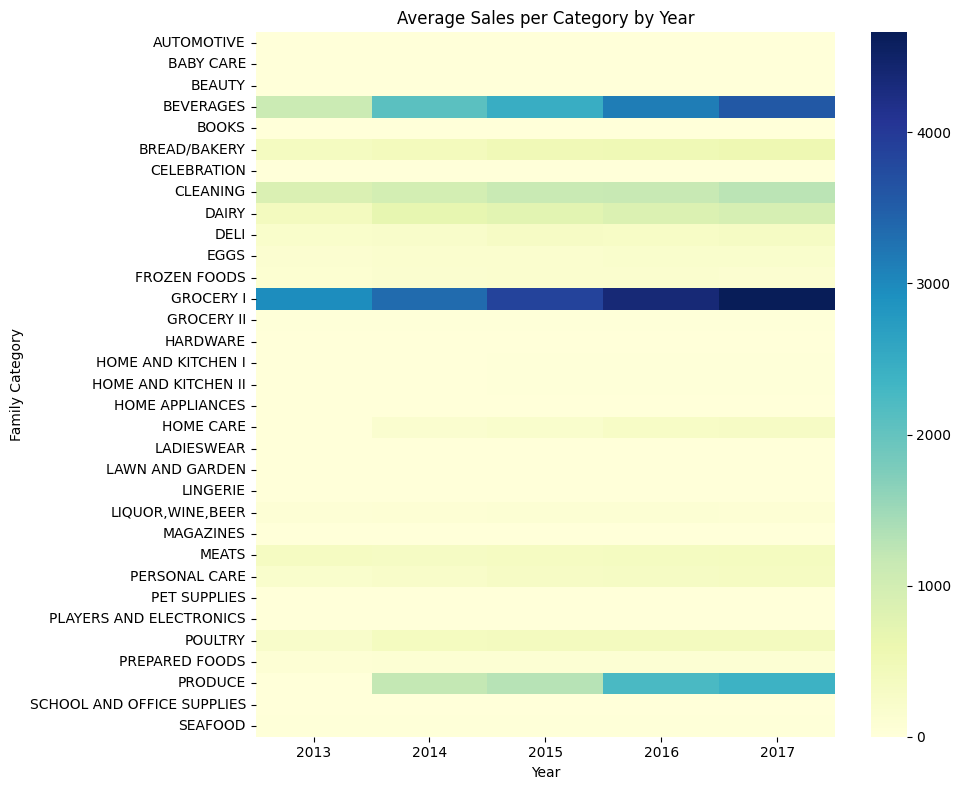

In [28]:
train["year"] = train["date"].dt.year

year_family_pivot = train.pivot_table(
    index="family", columns="year", values="sales", aggfunc="mean"
)

plt.figure(figsize=(10, 8))
sns.heatmap(year_family_pivot, cmap="YlGnBu", annot=False, fmt=".0f")
plt.title("Average Sales per Category by Year")
plt.xlabel("Year")
plt.ylabel("Family Category")
plt.tight_layout()
plt.show()

In [29]:
test["sales"] = np.nan

full_df = pd.concat([train, test], sort=False).sort_values(["store_nbr", "family", "date"]).reset_index(drop=True)

# Feature Engineering
full_df["lag_28"] = full_df.groupby(["store_nbr", "family"])["sales"].shift(28)
full_df["rolling_mean_28"] = (
    full_df.groupby(["store_nbr", "family"])["sales"]
    .transform(lambda x: x.shift(1).rolling(window=28, min_periods=1).mean())
)

full_df["lag_28"] = full_df["lag_28"].fillna(method="ffill").fillna(0)
full_df["rolling_mean_28"] = full_df["rolling_mean_28"].fillna(method="ffill").fillna(0)

train_fe = full_df[~full_df["sales"].isna()].copy()
test_fe = full_df[full_df["sales"].isna()].copy()

In [32]:
from lightgbm import LGBMRegressor, early_stopping, log_evaluation
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Label Encoding
le = LabelEncoder()
train_fe["family"] = le.fit_transform(train_fe["family"])
test_fe["family"] = le.transform(test_fe["family"])

features = ["store_nbr", "family", "onpromotion", "lag_28", "rolling_mean_28"]
target = "sales"

split_date = pd.Timestamp("2017-08-01")
train_data = train_fe[train_fe["date"] < split_date].copy()
val_data = train_fe[train_fe["date"] >= split_date].copy()

X_train = train_data[features]
y_train = np.log1p(train_data[target])
X_val = val_data[features]
y_val = np.log1p(val_data[target])


model = LGBMRegressor(n_estimators=2000, learning_rate=0.05, random_state=42)
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    callbacks=[
        early_stopping(stopping_rounds=100),
        log_evaluation(period=100)
    ]
)

y_pred = np.expm1(model.predict(X_val))
val_rmsle = mean_squared_log_error(np.expm1(y_val), np.maximum(0, y_pred))
print(f"Validation RMSLE: {val_rmsle:.5f}")

X_test = test_fe[features]
y_test_pred = np.expm1(model.predict(X_test))
y_test_pred = np.maximum(0, y_test_pred)

submission = test_fe[["id"]].copy()
submission["sales"] = y_test_pred
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv created!")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 2974158, number of used features: 5
[LightGBM] [Info] Start training from score 2.920052
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 0.177484
[200]	valid_0's l2: 0.173712
[300]	valid_0's l2: 0.171777
[400]	valid_0's l2: 0.170578
[500]	valid_0's l2: 0.169494
[600]	valid_0's l2: 0.169043
[700]	valid_0's l2: 0.168877
[800]	valid_0's l2: 0.168528
[900]	valid_0's l2: 0.168296
[1000]	valid_0's l2: 0.167955
[1100]	valid_0's l2: 0.167835
[1200]	valid_0's l2: 0.167662
[1300]	valid_0's l2: 0.167503
[1400]	valid_0's l2: 0.167381
[1500]	valid_0's l2: 0.167297
[1600]	valid_0's l2: 0.167377
Early stopping, best iteration is:
[1500]	valid_0's l2: 0.167

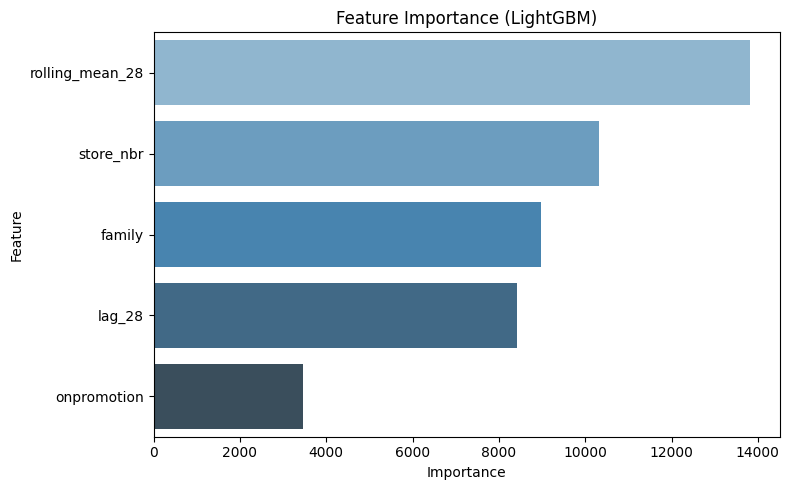

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances

}).sort_values("importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x="importance", y="feature", palette="Blues_d")
plt.title("Feature Importance (LightGBM)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()